# HW3 ATMS507

*Student: Haoyu Tang(hytang2)*

## Problem 1 Toy Data Assimilation
### Problem Description:
> Suppose $T$ is a continuous measurement, $T_f, T_o$ are model forecast and observed data resp. Denote the data vector $T=(T_f,T_o)^t$. Let $c=(c_1, c_2)^t \in \mathbb{R}^2$ be the blending vector. 
Suppose we draw $n$ random instances to form a dataset $\mathcal D$ of size $n$. We would like to determine $$ \mathrm{argmin}_{c} \mathbb{E} \left[ \sum_i (c^tT^{(i)} -  T_{true}^{(i)})^2 \right]$$ subjected to $c_1 + c_2 = 1, 0\leq c_1,c_2 \leq 1$

**Rmk**. From a machine learning perspective, we want to find a model with parameter $\mathbf{c}$ through MLE(maximum likelyhood maximization). The predictor is simply $f(T)= c^t T$ for a new, unkown data vector $T=(T_f, T_o)$ with loss function $\mathcal L = \sum_{i=1}^n (f(T)-T_{true})^2$


We first make some useful assumption:
#### Assumption:
We can assume $T_f,T_o$ are non-biased and normally distributed with variance $\epsilon_f^2, \epsilon_o^2$. As a result $c^tT \sim \mathcal N(T_{true}, c_1^2\epsilon_f^2 + c_2^2\epsilon_o^2)$

We can show that 
> **Lemma**
> $$ \mathrm{argmin}_{c} \mathbb{E} \left[ \sum_{i=1}^n (c^tT^{(i)} -  T_{true}^{(i)})^2 \right]  = \argmin_c (c_1^2\epsilon_f^2 + c_2^2\epsilon_o^2)$$

*proof:*
We directly evalute the L.H.S:
Denote the random variable $$X_i= c^tT^{(i)} -  T_{true} \sim \mathcal N{(0, c_1^2\epsilon_f^2 + c_2^2\epsilon_o^2)} $$ 

We are interested in $\mathbb{E}\left[ \sum_i X_i^2 \right]=\sum_i \mathbb{E}[X_i^2]$, note $X_i$ can be assumed to be i.i.d.s. From definition of variance:
$$
    \mathbb{E}[X_i^2]= c_1^2\epsilon_f^2 + c_2^2\epsilon_o^2 + \mathbb{E}[X_i]^2
$$
Since we assume unbiased measurement, we get $\mathbb{E}[X_i^2]= c_1^2\epsilon_f^2 + c_2^2\epsilon_o^2$                      

Now it boils down to minimizing the R.H.S. This is easy:
$$
\nabla(c_1^2\epsilon_f^2 + (1-c_1)^2\epsilon_o^2)=0
$$
Hence:
$$
\begin{align*}
2c_1 \epsilon_f^2 - 2(1-c_1)\epsilon_o^2 &=0 \\
2c_1(\epsilon_f^2+\epsilon_o^2) & = 2\epsilon_o^2\\
c_1 &= \frac{\epsilon_o^2}{\epsilon_f^2+\epsilon_o^2}
\end{align*}
$$
As a result:
$
    c_2 = \frac{\epsilon_f}{\epsilon_f^2+\epsilon_o^2}
$


### Result 

$$
\boxed{
\begin{cases}
c_1 &= \frac{\epsilon_o^2}{\epsilon_f^2+\epsilon_o^2} \\
c_2 &= \frac{\epsilon_f^2}{\epsilon_f^2+\epsilon_o^2} \\
\end{cases}
}
$$

Note $\|\mathbf{c}\|_1 = 1$(unit in L1 norm, the parameter vector(blend vector) as required)

### Analysis 

The result is personally impressive. Blending a noisey dataset(as long as it is non-biased) is still beneficial to the final model accuracy(the MLE solution still has nonzero components, although quadratically decayed). 

At the MLE $\mathbf{c}^*$, the dependency of output variance on dataset/model variance is:
$$
Var_{\text{model}}(\epsilon_o, \epsilon_f) = 2\frac{\epsilon_f^2\epsilon_o^2}{\epsilon_f^2+\epsilon_o^2}
$$

## Problem 2 Visualization of Monthly Temperature and Rain fall

In [2]:
import sys 

path = "/data/keeling/a/hytang2/Visualize/src"
sys.path.append(path)

from Visualize import Visualize
from DataSet import DataSet


In [4]:
#using my own tiny library 
data_paths_tp = {
    'tp' : "/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/data/monthly_rainfall/total_precipitation.grib"
}

data_paths_t2m = {
    't2m' : "/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/data/monthly_temperature/2m_temperature.grib"
}

ds_tp = DataSet(name="total_percipitation", 
             data_paths = data_paths_tp, 
             time_steps=372, 
             unit = 'm', 
             time_unit = 'months', 
             start_time = '1995-01', 
             data_format='cfgrib')

ds_t2m = DataSet(name="temperature", 
             data_paths = data_paths_t2m, 
             time_steps=372, 
             unit = 'm', 
             time_unit = 'months', 
             start_time = '1995-01', 
             data_format='cfgrib')


outputs_dir = "/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output"

In [ ]:
task_name = "total_percipitation"

vis = Visualize(task_name = task_name, 
                dataset = ds_tp,
                outputs_dir = outputs_dir
                )

In [ ]:
vis.populate_frame(lat = 30, lon = 120, dlat = 3, dlon=3, title="Total Percipitation Around ShaoXing")
vis.animate_from_frames()

The result of this visualization is:

![](output/total_percipitation/animation/total_percipitation.gif)

[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/total_percipitation_time_series' already exists
[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/total_percipitation_time_series/frame' already exists
[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/total_percipitation_time_series/animation' already exists
length of T is 372
length of time_seires is 372


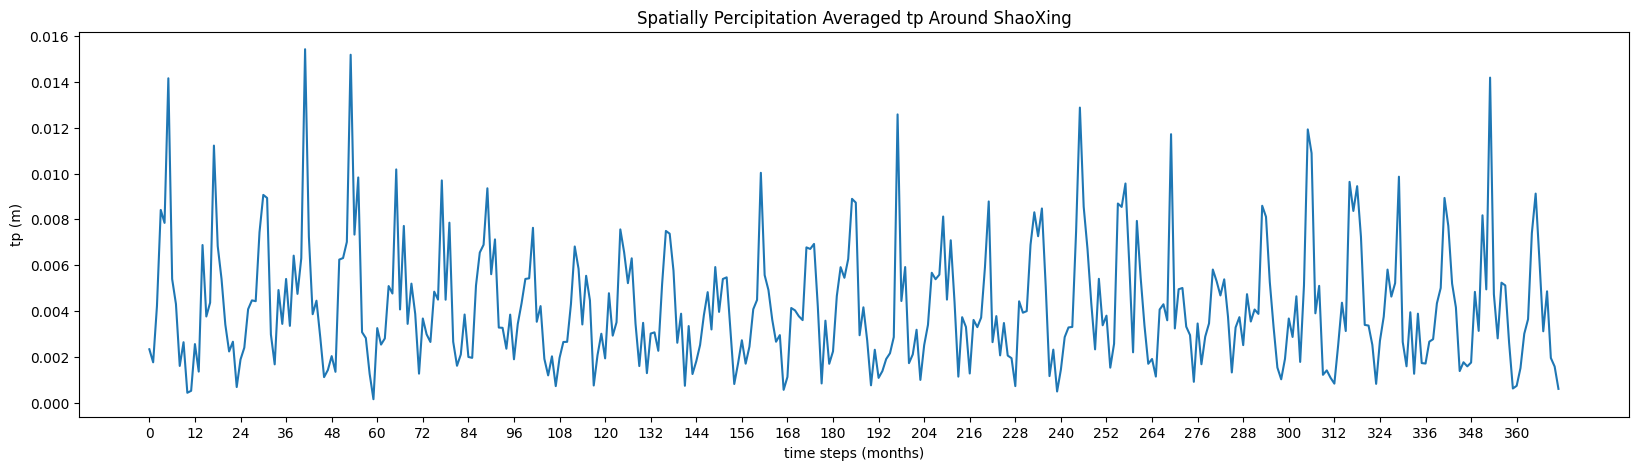

In [5]:
task_name = "total_percipitation_time_series"
vis = Visualize(task_name = task_name, 
                dataset = ds_tp,
                outputs_dir = outputs_dir
                )


vis.plot_time_series(lat = 30, lon = 120, dlat = 3, dlon=3, title="Spatially Percipitation Averaged tp Around ShaoXing")


[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/temperature_time_series' created
[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/temperature_time_series/frame' created
[Visualize-LOG] Directory '/data/keeling/a/hytang2/Climate_System_ATMS507/Main/HWs/HW3/output/temperature_time_series/animation' created
length of T is 372
length of time_seires is 372


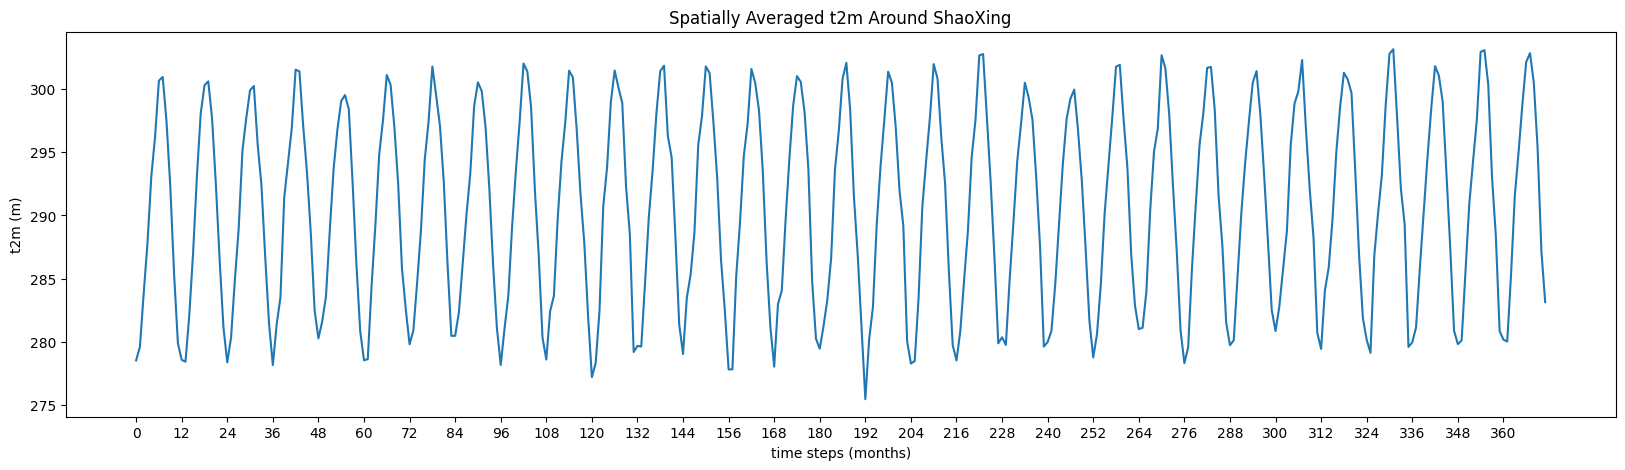

In [6]:
task_name = "temperature_time_series"
vis = Visualize(task_name = task_name, 
                dataset = ds_t2m,
                outputs_dir = outputs_dir
                )


vis.plot_time_series(lat = 30, lon = 120, dlat = 3, dlon=3, title="Spatially Averaged t2m Around ShaoXing")